# Analysis of the distribution of purchases

In [55]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
base_path = '../dataset'

original_data = os.path.join(base_path, 'original_data')
processed_data = os.path.join(base_path, 'processed_data')

In [57]:
purchases_mapped = pd.read_csv(os.path.join(processed_data, "train_purchases_mapped.csv"))
purchases_mapped

,session_id,item_id,date
0,3,12492,2020-12-18 21:26:47.986
1,13,3299,2020-03-13 19:36:15.507
2,18,17411,2020-08-26 19:20:32.049
3,19,11229,2020-11-02 17:16:45.92
4,24,11568,2020-02-26 18:27:44.114
...,...,...,...
999995,4439986,554,2021-05-13 11:56:37.464
999996,4439990,1592,2020-08-22 14:28:22.382
999997,4439994,3836,2020-11-27 20:10:28.961
999998,4439999,13432,2020-11-27 11:01:41.356


In [61]:
november_purchases = purchases_mapped[pd.to_datetime(purchases_mapped['date']).dt.month == 11].copy(deep=True)
november_purchases['day'] = pd.to_datetime(purchases_mapped['date']).dt.day
november_purchases

,session_id,item_id,date,day
3,19,11229,2020-11-02 17:16:45.92,2
9,44,6925,2020-11-27 20:46:08.951,27
26,156,1285,2020-11-27 12:49:17.506,27
49,315,10019,2020-11-13 10:55:42.067,13
68,412,9044,2020-11-30 09:10:14.813,30
...,...,...,...,...
999975,4439907,16744,2020-11-28 16:04:35.186,28
999980,4439930,13392,2020-11-06 10:20:28.328,6
999989,4439954,118,2020-11-29 20:49:02.302,29
999997,4439994,3836,2020-11-27 20:10:28.961,27


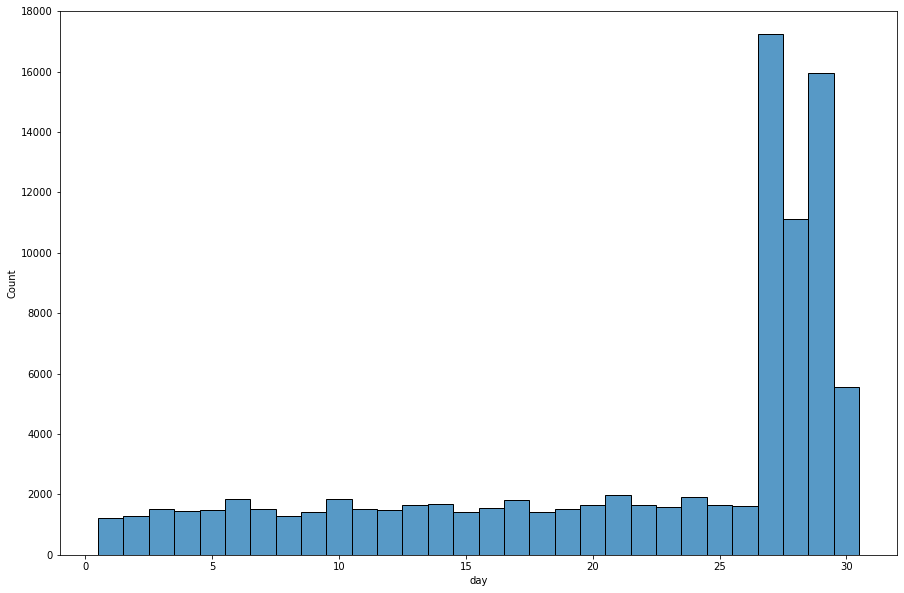

In [39]:
plt.figure(figsize=(15,10))

hist = sns.histplot(data = november_purchases['day'], discrete=True) # Se son discreti è da specificare
hist.set_ylim(0, 18000)
plt.show()

In [37]:
december_purchases = purchases_mapped[pd.to_datetime(purchases_mapped['date']).dt.month == 12].copy(deep=True)
december_purchases['day'] = pd.to_datetime(purchases_mapped['date']).dt.day
december_purchases

/var/folders/j4/lrzvgqtj3bz3ynm2xlxsxtc00000gn/T/ipykernel_12805/2794798097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  december_purchases['day'] = pd.to_datetime(purchases_mapped['date']).dt.day


,session_id,item_id,date,day
0,3,12492,2020-12-18 21:26:47.986,18
28,171,11962,2020-12-18 01:12:30.945,18
36,208,18746,2020-12-13 09:56:28.935,13
37,226,4911,2020-12-12 11:54:16.573,12
43,248,7451,2020-12-14 13:10:53.162,14
...,...,...,...,...
999955,4439816,4870,2020-12-01 22:00:30.328,1
999958,4439828,1285,2020-12-15 18:04:32.907,15
999963,4439875,16141,2020-12-08 20:52:19.182,8
999967,4439891,2473,2020-12-16 21:21:54.349,16


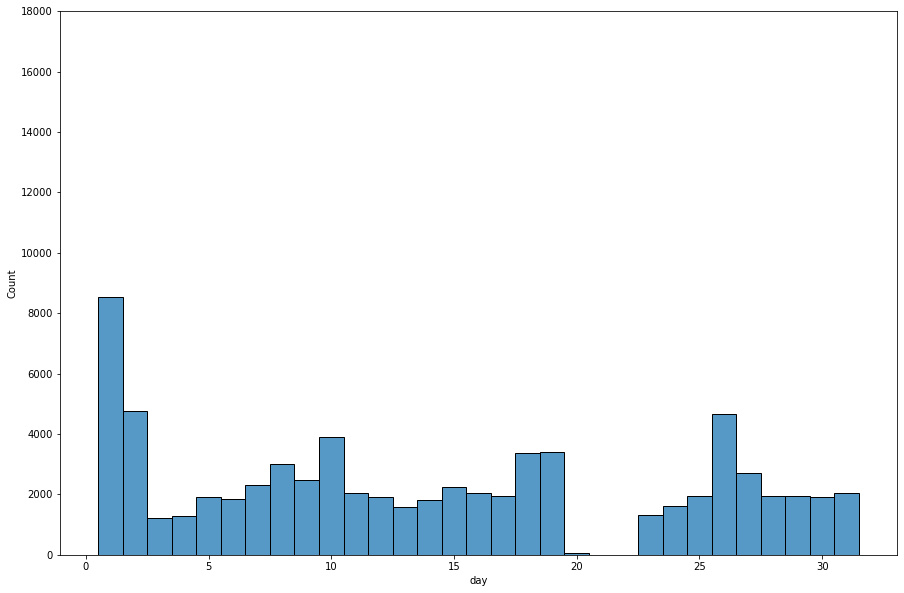

In [40]:
plt.figure(figsize=(15,10))

hist = sns.histplot(data = december_purchases['day'], discrete=True) # Se son discreti è da specificare
hist.set_ylim(0, 18000)
plt.show()

# Purchased items during black friday and before black friday

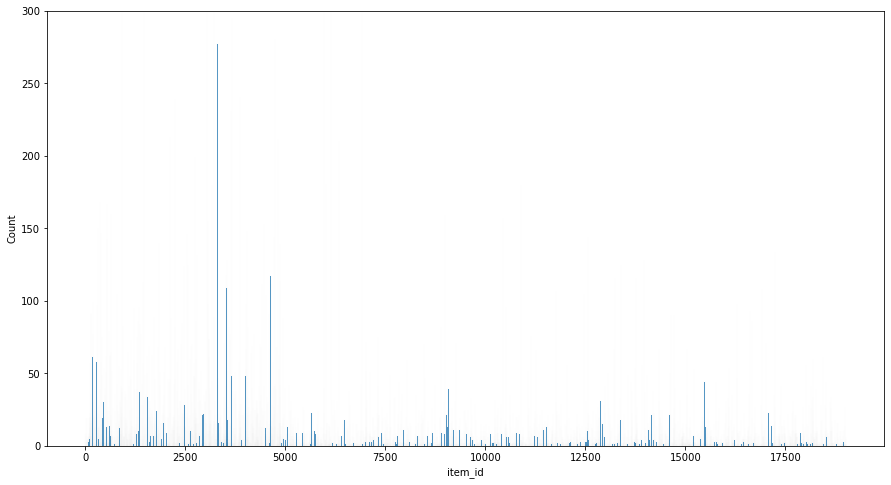

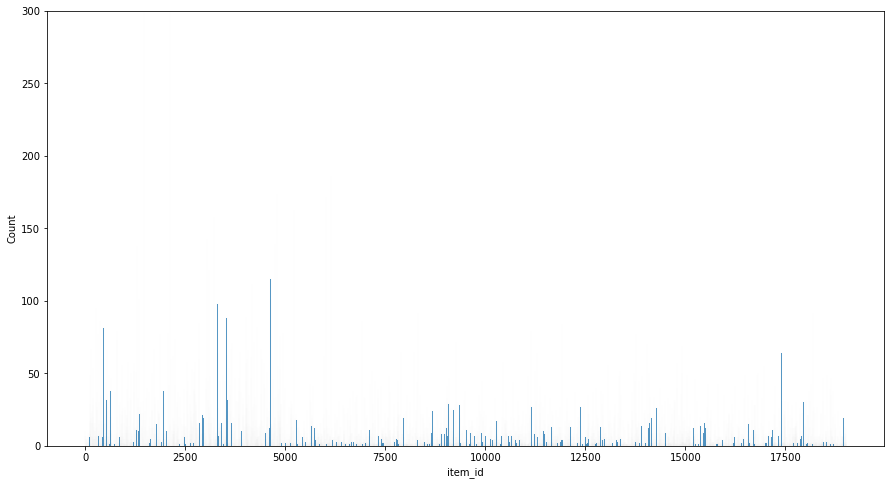

In [52]:
plt.figure(figsize=(15,8))

hist = sns.histplot(data = november_purchases[november_purchases['day'].between(27,30)]['item_id'], discrete=True) # Se son discreti è da specificare
hist.set_ylim(0, 300)
plt.show()

plt.figure(figsize=(15,8))

hist = sns.histplot(data = november_purchases[november_purchases['day'].between(1,26)]['item_id'], discrete=True) # Se son discreti è da specificare
hist.set_ylim(0, 300)
plt.show()

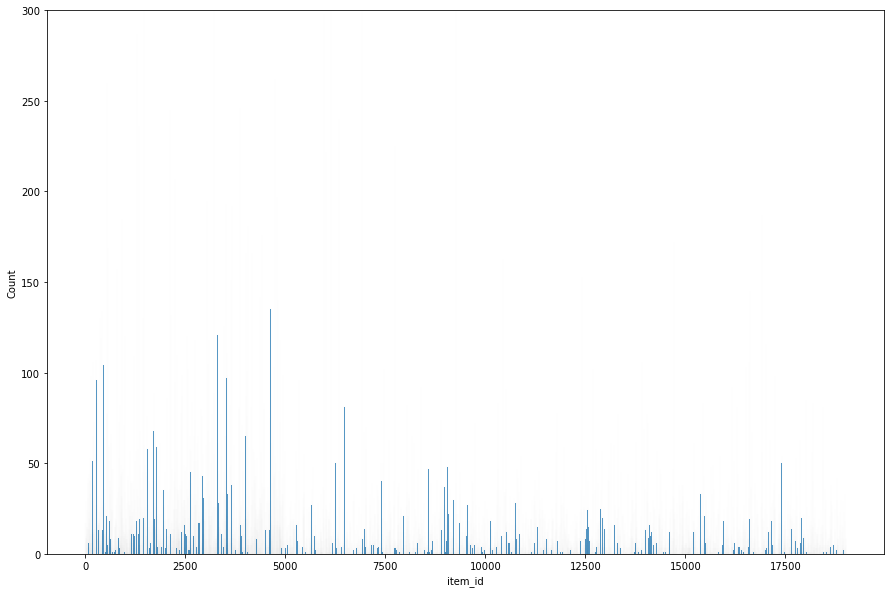

In [51]:
plt.figure(figsize=(15,10))

hist = sns.histplot(data = december_purchases['item_id'], discrete=True) # Se son discreti è da specificare
hist.set_ylim(0, 300)
plt.show()

/var/folders/j4/lrzvgqtj3bz3ynm2xlxsxtc00000gn/T/ipykernel_12805/2207438044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  october_purchases['day'] = pd.to_datetime(purchases_mapped['date']).dt.day


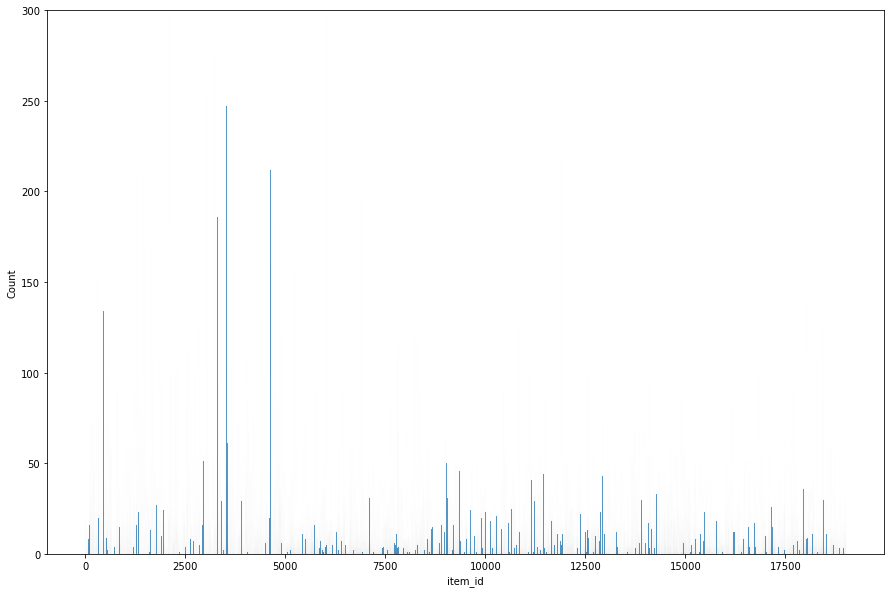

/var/folders/j4/lrzvgqtj3bz3ynm2xlxsxtc00000gn/T/ipykernel_12805/2207438044.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  september_purchases['day'] = pd.to_datetime(purchases_mapped['date']).dt.day


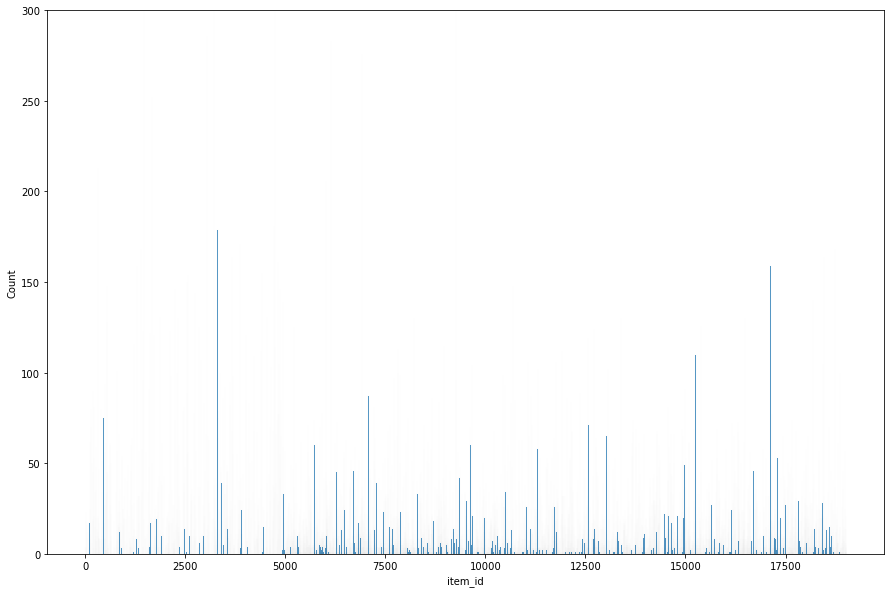

In [62]:
october_purchases = purchases_mapped[pd.to_datetime(purchases_mapped['date']).dt.month == 10]
october_purchases['day'] = pd.to_datetime(purchases_mapped['date']).dt.day

plt.figure(figsize=(15,10))

hist = sns.histplot(data = october_purchases['item_id'], discrete=True) # Se son discreti è da specificare
hist.set_ylim(0, 300)
plt.show()

september_purchases = purchases_mapped[pd.to_datetime(purchases_mapped['date']).dt.month == 9]
september_purchases['day'] = pd.to_datetime(purchases_mapped['date']).dt.day

plt.figure(figsize=(15,10))

hist = sns.histplot(data = september_purchases['item_id'], discrete=True) # Se son discreti è da specificare
hist.set_ylim(0, 300)
plt.show()

/var/folders/j4/lrzvgqtj3bz3ynm2xlxsxtc00000gn/T/ipykernel_12805/732744201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  august_purchases['day'] = pd.to_datetime(purchases_mapped['date']).dt.day


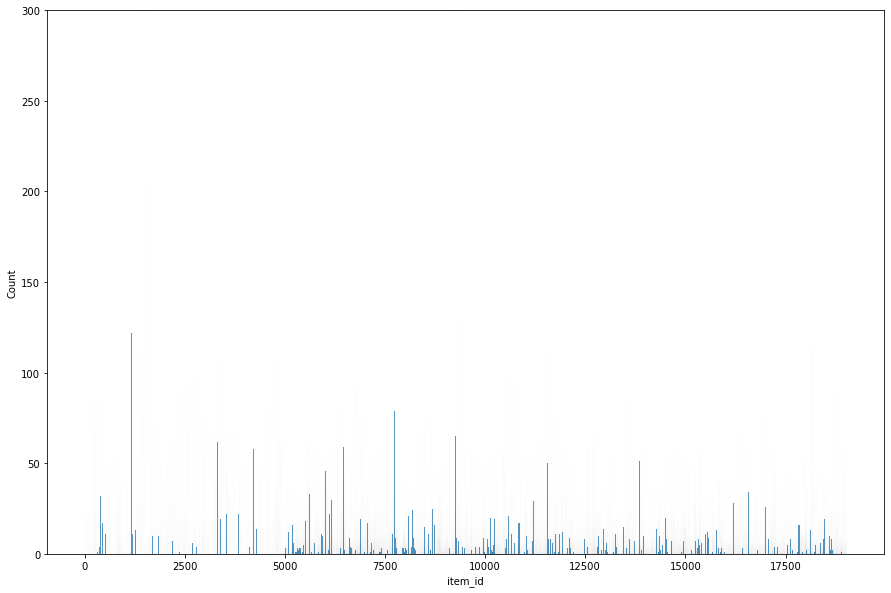

In [63]:
august_purchases = purchases_mapped[pd.to_datetime(purchases_mapped['date']).dt.month == 8]
august_purchases['day'] = pd.to_datetime(purchases_mapped['date']).dt.day

plt.figure(figsize=(15,10))

hist = sns.histplot(data = august_purchases['item_id'], discrete=True) # Se son discreti è da specificare
hist.set_ylim(0, 300)
plt.show()

/var/folders/j4/lrzvgqtj3bz3ynm2xlxsxtc00000gn/T/ipykernel_12805/1602070809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july_purchases['day'] = pd.to_datetime(purchases_mapped['date']).dt.day


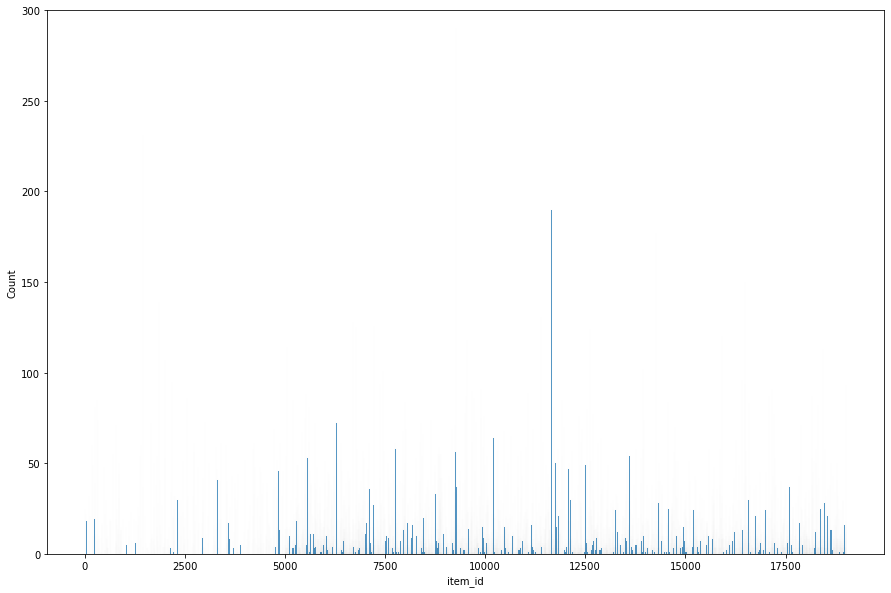

In [64]:
july_purchases = purchases_mapped[pd.to_datetime(purchases_mapped['date']).dt.month == 7]
july_purchases['day'] = pd.to_datetime(purchases_mapped['date']).dt.day

plt.figure(figsize=(15,10))

hist = sns.histplot(data = july_purchases['item_id'], discrete=True) # Se son discreti è da specificare
hist.set_ylim(0, 300)
plt.show()